## 11660번
N X N 행렬의 ($x_1,y_1$)와 ($x_2, y_2$) 사이 원소의 합을 구하여라.
- 입력)첫 줄에 N과 테스트 케이스 수가 주어지고 다음 줄에 1번째 행부터 N번째 행 데이터가 주어진다.<br>
  $~~\quad$ 이후 $x_1, y_1, x_2, y_2$가 테스트 케이스 수만큼 줄별로 주어진다.<br>
  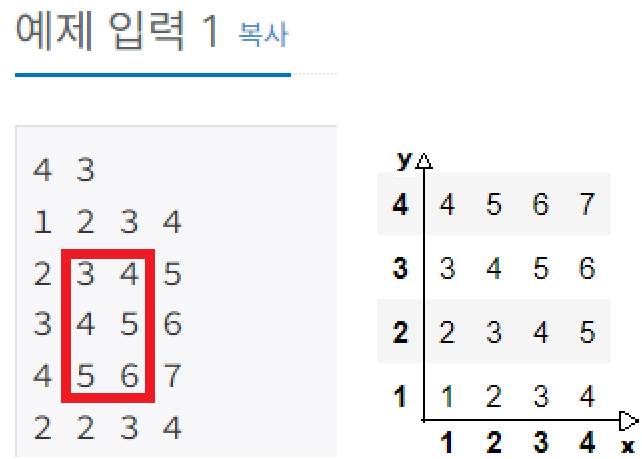<br>
- 출력)테스트 케이스별 ($x_1,y_1$)와 ($x_2, y_2$) 사이 원소의 합을 구한다.
  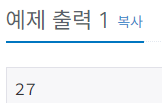
- https://www.acmicpc.net/problem/11660

### 방법
- 매회 $x_1, y_1, x_2, y_2$에 대해 구간 합을 구할 경우 시간이 오래 걸릴 것이다. `누적합 행렬`을 만든 뒤 간단한 산술연산으로 답을 구할 수 있게 해야 한다.
- 본 문제의 관건은 `index가 1부터 시작하도록` 누적합 행렬을 만들고 구간합을 구하도록 수식을 작성해야 한다는 것이다.
- 2차원 데이터에서 누적합 행렬은 $(1,1)$에서 해당 좌표($(x,y)$)까지의 구간합을 원소로 가지면 된다.<br>
  누적합 행렬을 작성할 때도 매회 slicing할 경우 시간이 오래 걸린다.
- 누적합 행렬의 $(x,y)$원소는 $(x-1, y)$원소와 $(x,y-1)$원소를 합한 뒤 앞에서 합한 두 원소에 중복된 $(x-1,y-1)$원소를 빼면 된다.<br>
  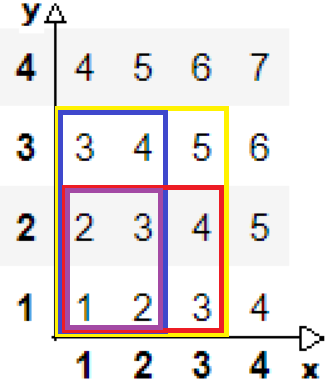
  <center>(노란 상자의 누적합은 빨간 상자의 누적합, 파란 상자의 누적합을 더하고 공통된 보라색 상자의 누적합을 빼면 된다.)</center><br>
- 누적합 행렬을 사용해 ($x_1,y_1$)와 ($x_2, y_2$) 사이 원소의 합을 구하는 것은 역순으로 진행된다.
  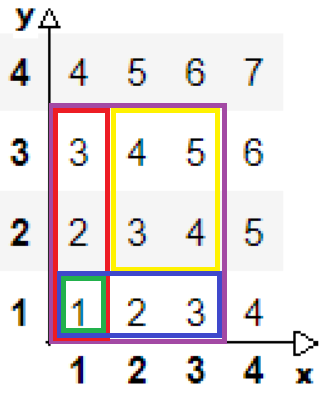
  <center>(노란 상자의 누적합을 구하기 위해선 보라색 상자의 누적합에 빨간 상자 누적합, 파란 상자 누적합을 빼고 <br>중복으로 빼진 초록 상자의 누적합을 더하면 된다.)<br>


In [ ]:
# numpy를 사용해 slicing할 경우 런타임 오류가 난다.
import sys
import numpy as np

input = sys.stdin.readline
n, c = map(int, input().split())
data = np.array([list(map(int, input().split())) for i in range(n)])
ssum = [[0]*(n+1)]
for x in range(n):
    ease = [0]
    for y in range(n):
        ease.append(sum(data[:x+1, :y+1].flatten()))
    ssum.append(ease)

for case in range(c):
    x1, y1, x2, y2 = map(lambda x: int(x), input().split())
    print(ssum[x2][y2] - ssum[x2][y1-1] - ssum[x1-1][y2] + ssum[x1-1][y1-1])

In [ ]:
# 105368 KB, 1128 ms
import sys

input = sys.stdin.readline
n, c = map(int, input().split())
data = [[0]*(n+1)]
for i in range(n):
    data.append([0]+[int(v) for v in input().split()])
    
# 아래의 코드로 빈 ssum을 만들 경우 오류가 난다.
# ssum = [[0]*(n+1)]*(n+1)
ssum = [[0]*(n+1) for _ in range(n+1)]
for x in range(1, n+1):
    for y in range(1, n+1):
        ssum[x][y] = data[x][y] + ssum[x][y-1] + ssum[x-1][y] - ssum[x-1][y-1]
        
for case in range(c):
    x1, y1, x2, y2 = map(lambda x: int(x), input().split())
    print(ssum[x2][y2] - ssum[x2][y1-1] - ssum[x1-1][y2] + ssum[x1-1][y1-1])